# Histogram

In [1]:
import sys
sys.path.append('../../utils')

import utils

In [2]:
import warnings

import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from plotly.offline import plot, iplot, init_notebook_mode

sns.set_style('whitegrid')
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

In [3]:
rng = np.random.default_rng(1234567890)
arr = rng.standard_normal(10000)

## Matplotlib

[Documentation](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist.html)

In [4]:
import matplotlib.pyplot as plt

### Simple Histogram

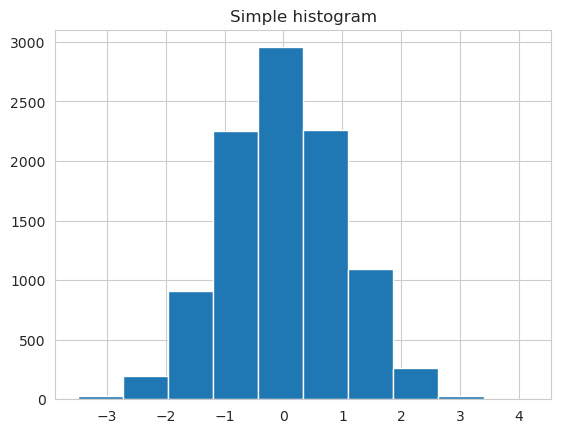

In [5]:
plt.hist(arr)
plt.title('Simple histogram')

# Saving the image
utils.save_mpl(1)

plt.show()

### Altering bin size

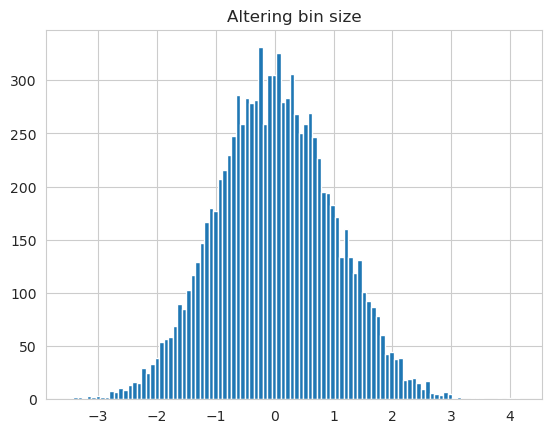

In [6]:
plt.hist(arr, bins=100)
plt.title('Altering bin size')
utils.save_mpl(2)
plt.show()

### Changing bar color

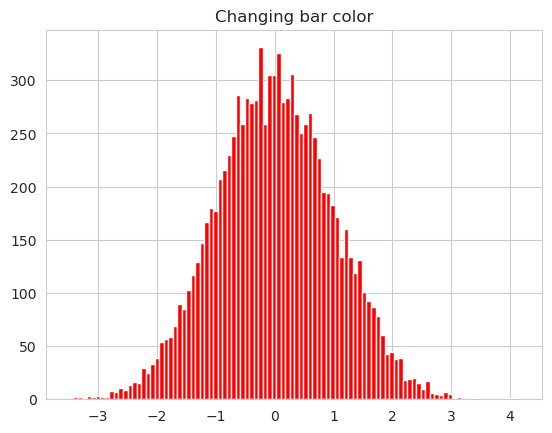

In [7]:
plt.hist(arr, bins=100, color='r')
plt.title('Changing bar color')
utils.save_mpl(3)
plt.show()

### Adding titles and x,y label

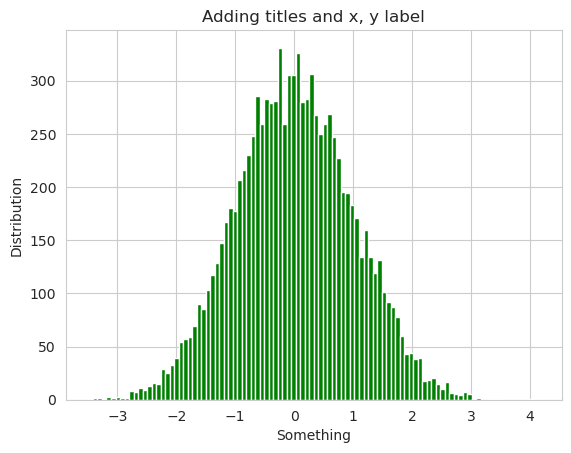

In [8]:
plt.hist(arr, bins=100, color='g')
plt.title('Adding titles and x, y label')
plt.xlabel('Something')
plt.ylabel('Distribution')

utils.save_mpl(4)
plt.show()

### Updating histogram colors

[Link](https://matplotlib.org/stable/gallery/statistics/hist.html)

In [9]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

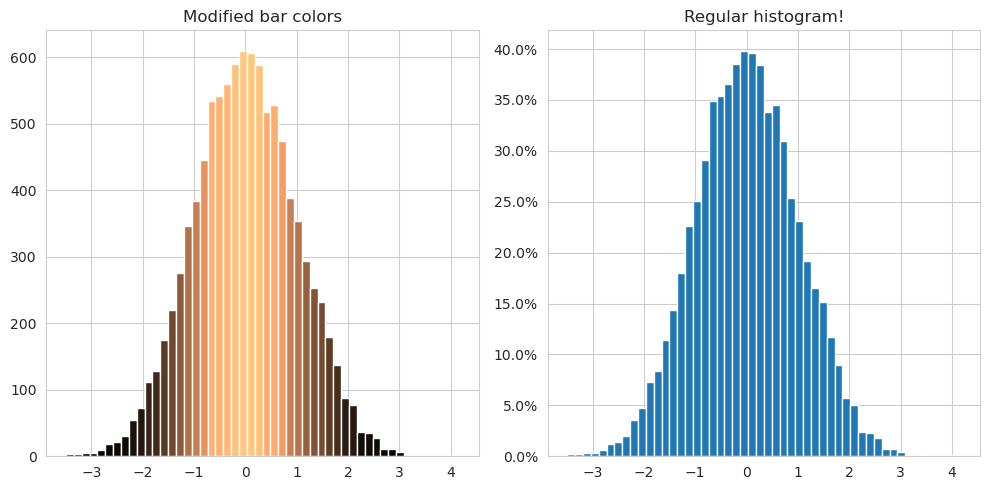

In [10]:
fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(10, 5))

n_bins=50

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(arr, bins=n_bins)
# We'll color code by height, but you could use any scalar
fracs = N / N.max()
# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.copper(norm(thisfrac))
    thispatch.set_facecolor(color)

# Setting title for this axes
axs[0].set_title('Modified bar colors')
    
# We can also normalize our inputs by the total number of counts
axs[1].hist(arr, bins=n_bins, density=True)

# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1].set_title('Regular histogram!')

utils.save_mpl(5)

### 2-dimensional Histograms

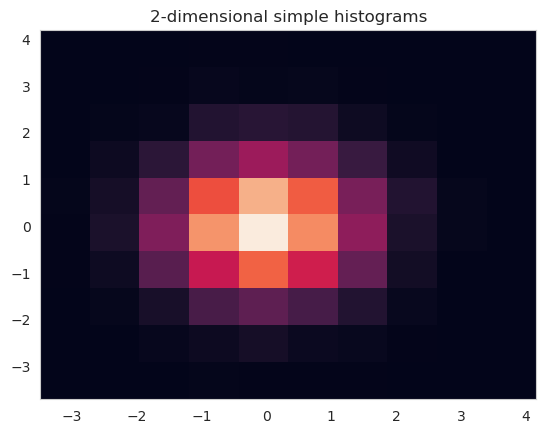

In [11]:
# Creating a second distribution
arr2 = rng.standard_normal(10000)

plt.hist2d(arr, arr2)
plt.title('2-dimensional simple histograms')

utils.save_mpl(6)

plt.show()

### Increasing number of bins in a 2d-histogram

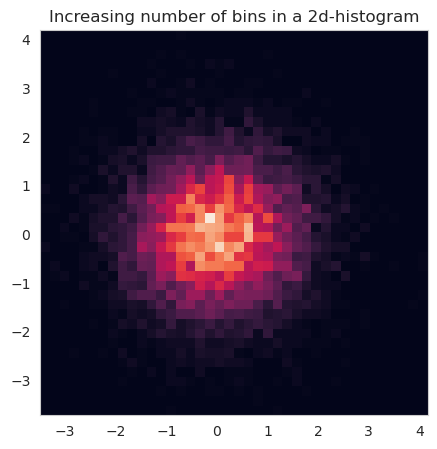

In [12]:
plt.figure(figsize=(5, 5))

# Increasing number of bins
plt.hist2d(arr, arr2, bins=40)
plt.title('Increasing number of bins in a 2d-histogram')

utils.save_mpl(7)
plt.show()

### Changing hist-2d cmap

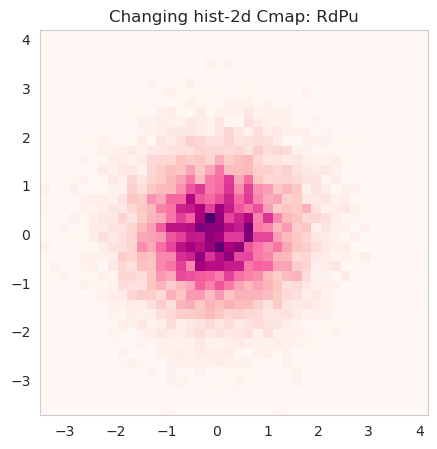

In [13]:
plt.figure(figsize=(5,5))
plt.hist2d(arr, arr2, bins=40, cmap='RdPu')
plt.title('Changing hist-2d Cmap: RdPu')

utils.save_mpl(8)

plt.show()

### Subplots of hist2d plots

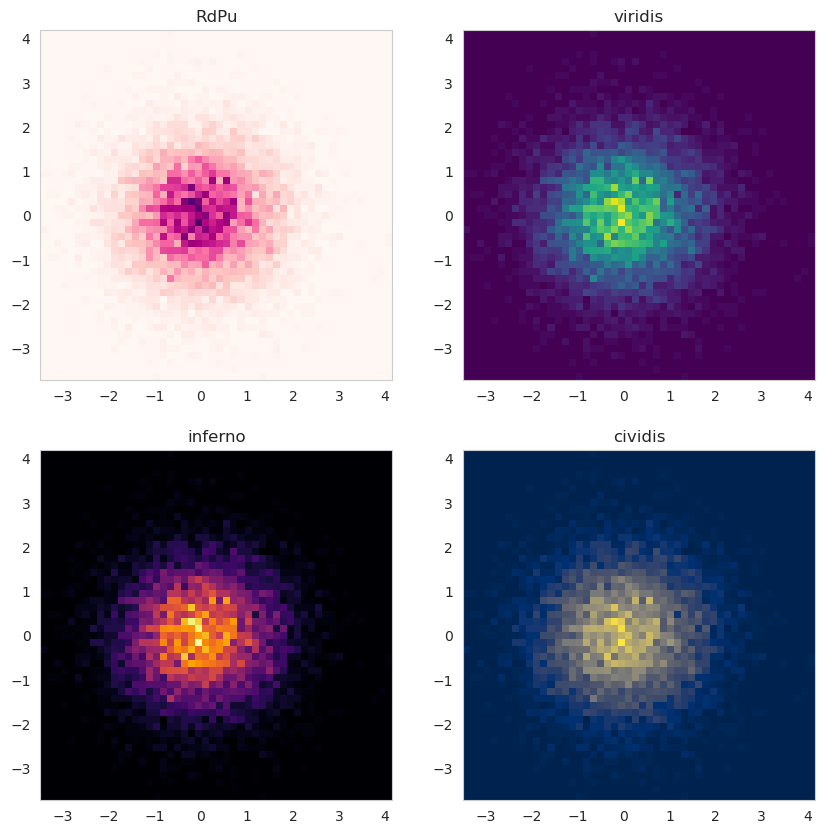

In [14]:
_, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

idx = 0
cmaps = ['RdPu', 'viridis', 'inferno', 'cividis']

for i in range(2):
    for j in range(2):
        ax[i][j].hist2d(arr, arr2, bins=50, cmap=cmaps[idx])
        ax[i][j].set_title(cmaps[idx])
        idx += 1
        
utils.save_mpl(9)
plt.show()

### hist2d with log normal colors

This requires `matplotlib.colors` so just do

```python
from matplotlib import colors
```

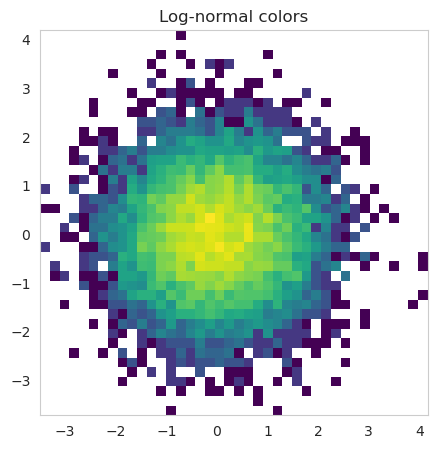

In [15]:
from matplotlib import colors

plt.figure(figsize=(5,5))
plt.hist2d(arr, arr2, bins=40, cmap='viridis', norm=colors.LogNorm())
plt.title('Log-normal colors')

utils.save_mpl(10)

plt.show()

### histogram with `mean` & `median` drawn

In [16]:
from scipy.stats import skewnorm

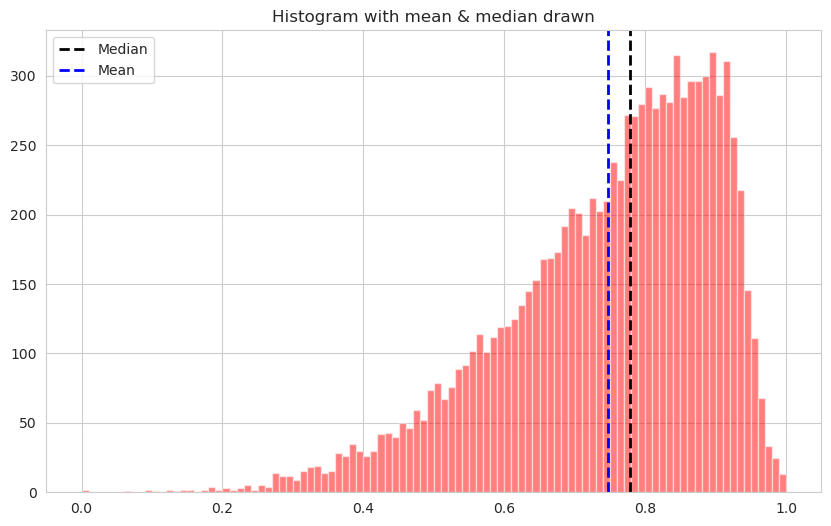

In [17]:
plt.figure(figsize=(10, 6))

# Creating left skewed data
left_skewed = skewnorm.rvs(a=-10,loc=100,size=10000)

left_skewed = left_skewed - min(left_skewed)
left_skewed = left_skewed / max(left_skewed)

plt.hist(left_skewed, alpha=.5, bins=100, color='r')
plt.axvline(np.median(left_skewed), color="black", ls="--", lw=2, label="Median")
plt.axvline(np.mean(left_skewed), color="blue", ls="--", lw=2, label="Mean")

plt.legend()
plt.title('Histogram with mean & median drawn')

utils.save_mpl(11)

plt.show()

## Seaborn

[Documentation](https://seaborn.pydata.org/generated/seaborn.distplot.html)

In [18]:
import seaborn as sns

### Histogram using `sns.distplot()`

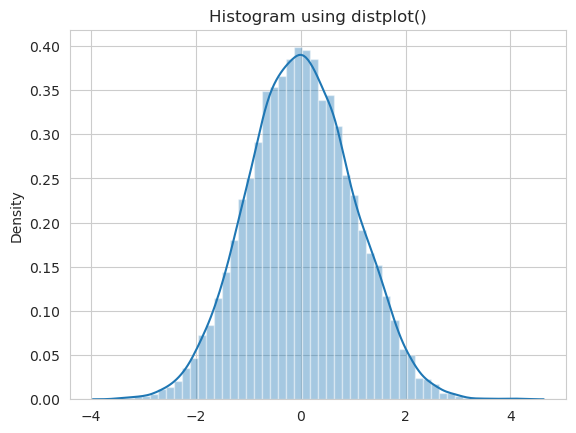

In [19]:
sns.distplot(arr)
plt.title('Histogram using distplot()')

# Saving the image
utils.save_sns(1)

plt.show()

### Histogram using `sns.displot()`

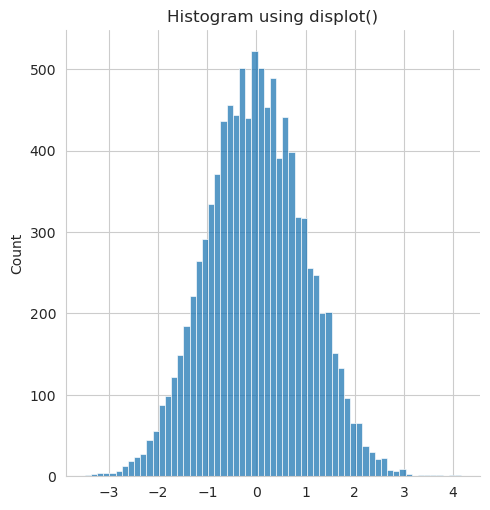

In [20]:
sns.displot(arr)
plt.title('Histogram using displot()')

# Saving the image
utils.save_sns(2)

plt.show()

### `sns.displot` in `kde` (Kernel Density Estimation) mode

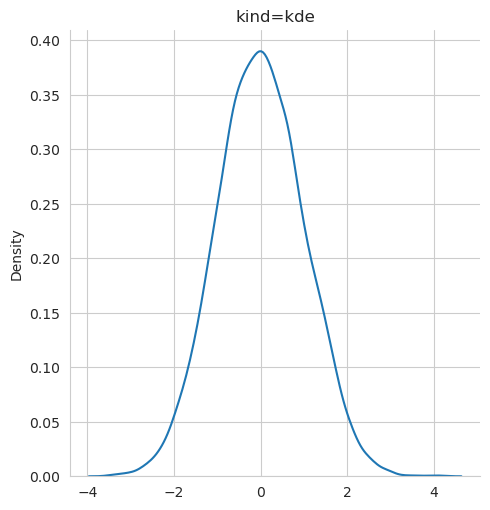

In [21]:
sns.displot(arr, kind='kde')
plt.title('kind=kde')

# Saving the image
utils.save_sns(3)

plt.show()

### `sns.displot` in `ecdf` (Empirical cumulative distribution functions) mode

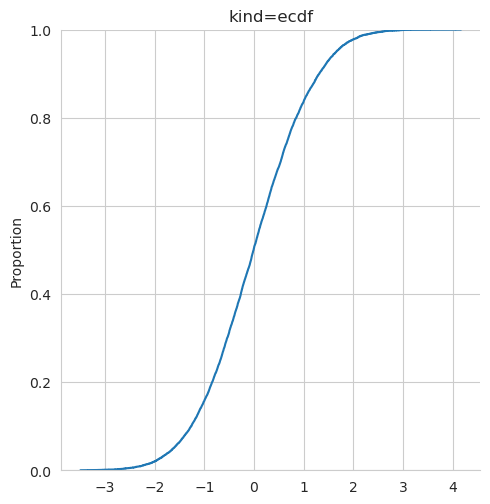

In [22]:
sns.displot(arr, kind='ecdf')
plt.title('kind=ecdf')

# Saving the image
utils.save_sns(4)

plt.show()

### Histogram bars with KDEs enabled

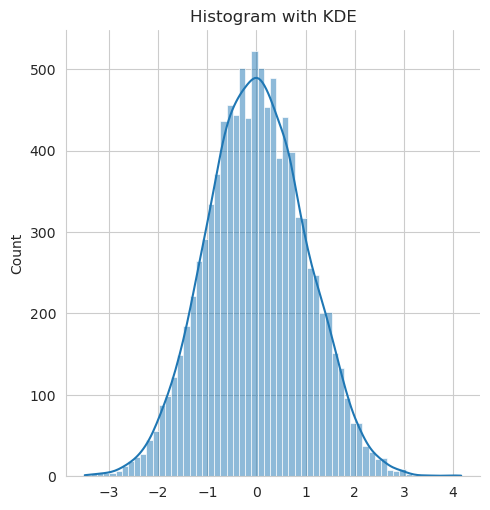

In [23]:
sns.displot(arr, kde=True)
plt.title('Histogram with KDE')

# Saving the image
utils.save_sns(5)

plt.show()

### 2d histogram with `sns.displot()`

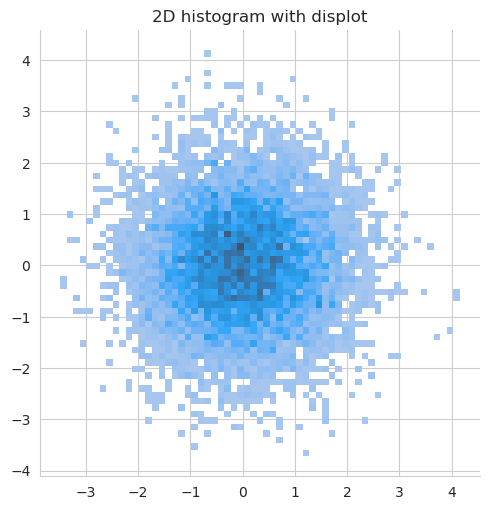

In [24]:
sns.displot(x=arr, y=arr2)
plt.title('2D histogram with displot')

# Saving the image
utils.save_sns(6)

plt.show()

### Bivariate histogram (2D) using KDEs

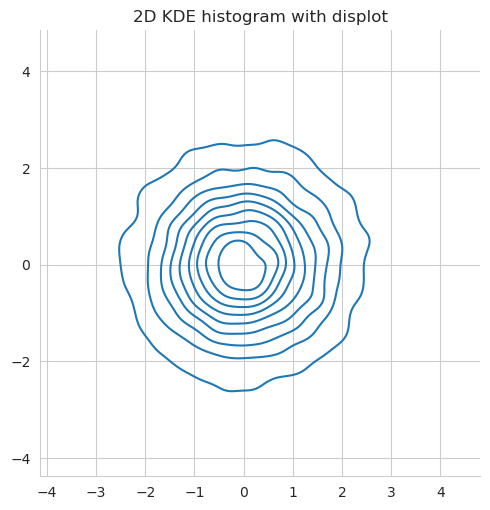

In [25]:
sns.displot(x=arr, y=arr2, kind='kde')
plt.title('2D KDE histogram with displot')

# Saving the image
utils.save_sns(7)

plt.show()

### Plotting marginal `rug` alongside 2d-hist

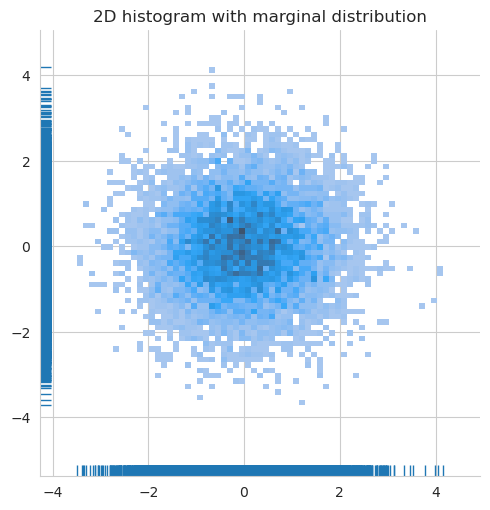

In [26]:
sns.displot(x=arr, y=arr2, rug=True)
plt.title('2D histogram with marginal distribution')

# Saving the image
utils.save_sns(8)

plt.show()

### Plotting the distribution on the vertical axis (`distplot`)

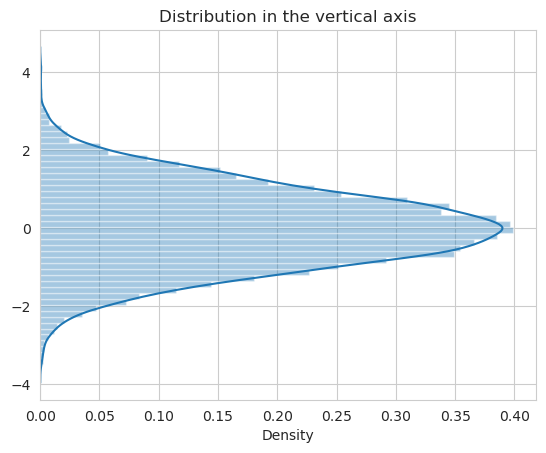

In [27]:
sns.distplot(arr, vertical=True)
plt.title('Distribution in the vertical axis')

# Saving the image
utils.save_sns(9)

plt.show()

### Modifying the rug, kde and hist elements of a plot

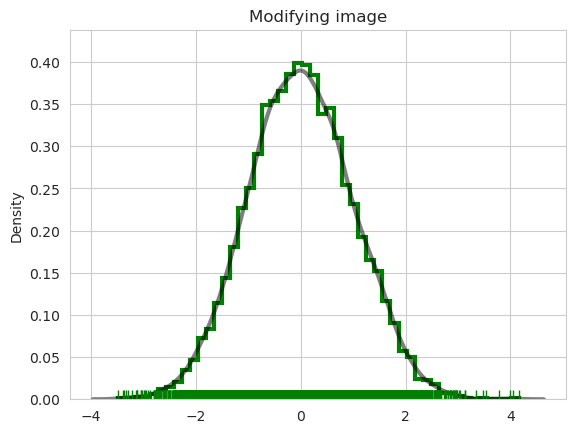

In [28]:
sns.distplot(arr, rug=True, rug_kws={'color': 'g'},
             kde_kws={'color': 'k', 'lw': 3, 'label': 'KDE', 'alpha':.5},
             hist_kws={'histtype': 'step', 'linewidth': 3,
                       'alpha': 1, 'color': 'g'})

plt.title('Modifying image')

# Saving the image
utils.save_sns(10)

plt.show()

### Plotting from DataFrame

#### Distribution of a continous column

In [29]:
penguins = sns.load_dataset('penguins')

taking a look at the `penguins` dataset

In [30]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


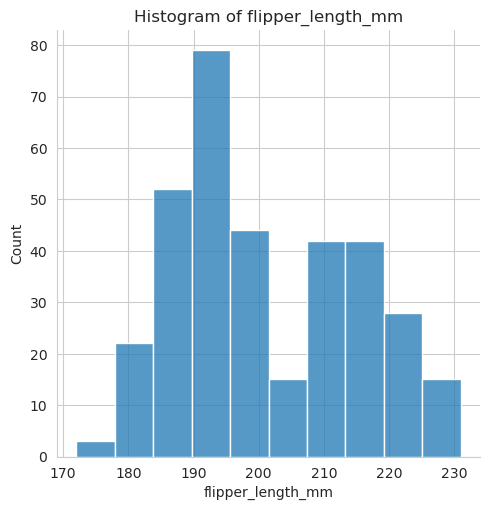

In [31]:
sns.displot(data=penguins, x='flipper_length_mm')
plt.title('Histogram of flipper_length_mm')

# Saving the image
utils.save_sns(11)

plt.show()

#### KDE Distribution of a continous dataframe column

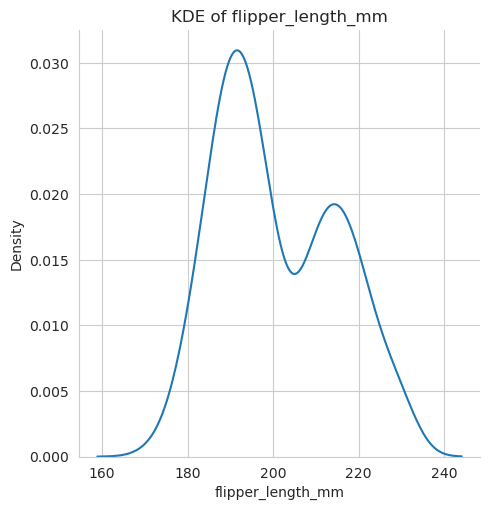

In [32]:
sns.displot(data=penguins, x='flipper_length_mm', kind='kde')
plt.title('KDE of flipper_length_mm')

# Saving the image
utils.save_sns(12)

plt.show()

#### Bivariate plot for two DataFrame columns

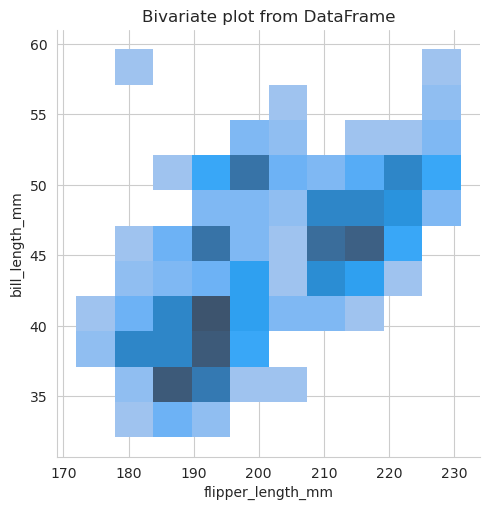

In [33]:
sns.displot(data=penguins, x="flipper_length_mm", y="bill_length_mm")
plt.title('Bivariate plot from DataFrame')

# Saving the image
utils.save_sns(13)

plt.show()

#### Plotting multiple histograms at once

Using a categorical column as `hue`, the column name passed as the `hue` argument would generate same number of plots as unique values 

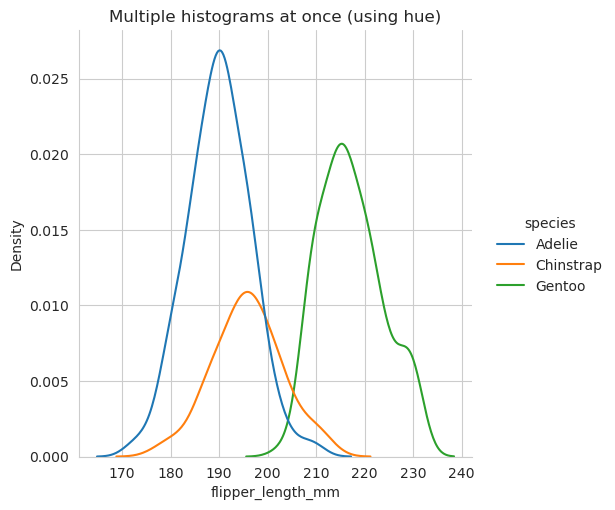

In [34]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind="kde")
plt.title('Multiple histograms at once (using hue)')

# Saving the image
utils.save_sns(14)

plt.show()

#### Additional keywords with multiple histograms

Additional keyword arguments are passed to the appropriate underlying plotting function, allowing for further customization:

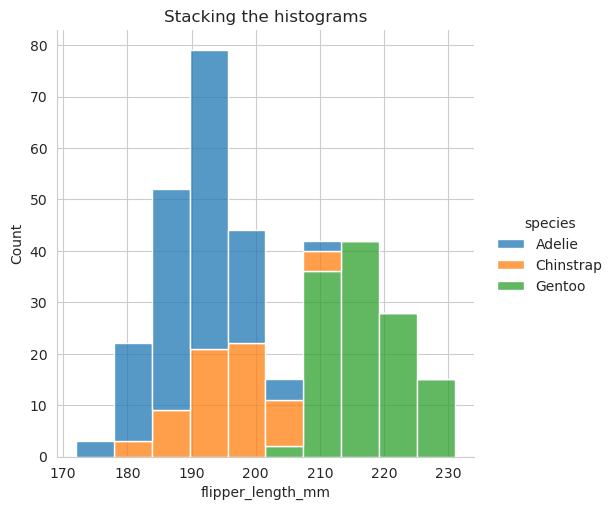

In [35]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")
plt.title('Stacking the histograms')

# Saving the image
utils.save_sns(15)

plt.show()

#### Plotting histograms from subsets of the dataset

The figure is constructed using a [`FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid), meaning that you can also show subsets on distinct subplots, or 'facets'

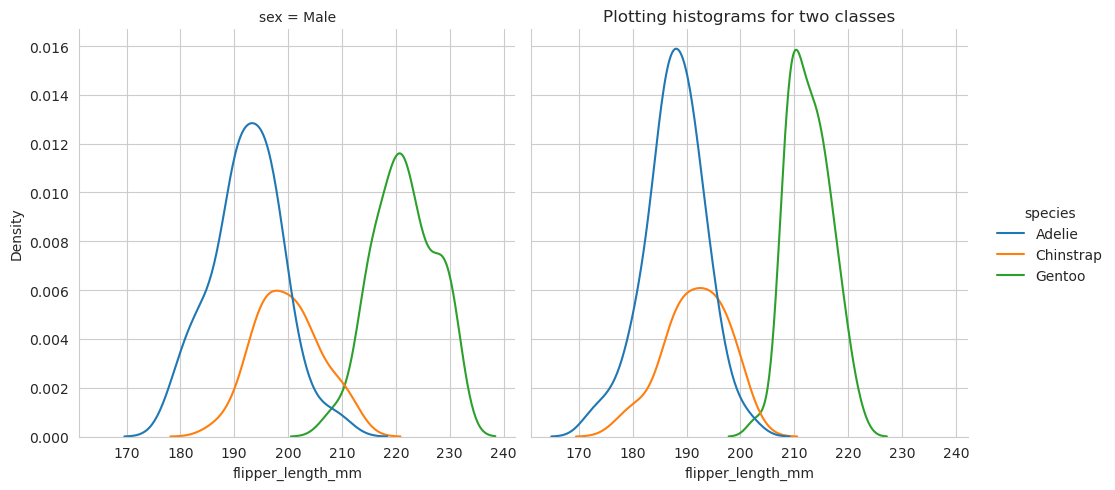

In [36]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="sex", kind="kde")
plt.title('Plotting histograms for two classes')

# Saving the image
utils.save_sns(16)

plt.show()

#### Altering image height and aspect ratio

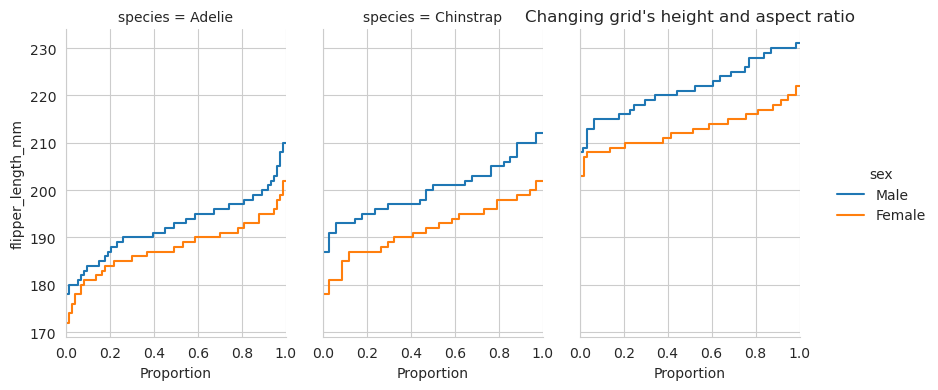

In [37]:
sns.displot(
    data=penguins, y="flipper_length_mm", hue="sex", col="species",
    kind="ecdf", height=4, aspect=.7,
)
plt.title("Changing grid's height and aspect ratio")

# Saving the image
utils.save_sns(17)

plt.show()

#### Altering the FacetGrid object properties after creation

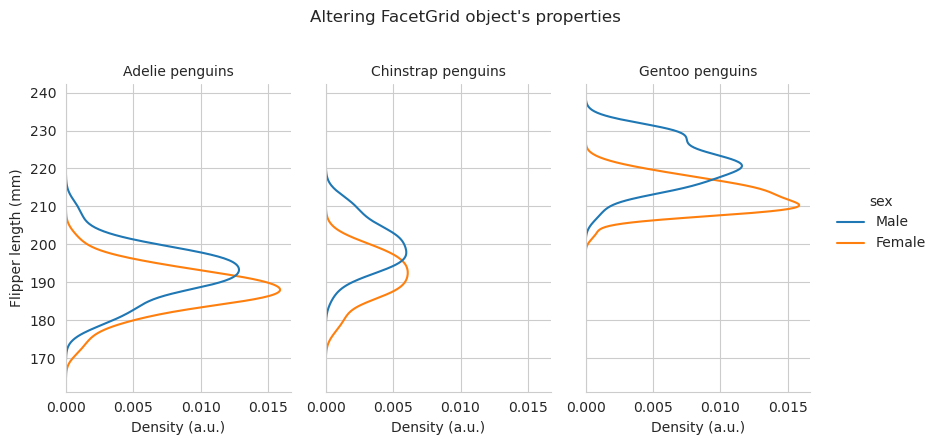

In [38]:
g = sns.displot(
    data=penguins, y="flipper_length_mm", hue="sex", col="species",
    kind="kde", height=4, aspect=.7,
)
g.set_axis_labels("Density (a.u.)", "Flipper length (mm)")
g.set_titles("{col_name} penguins")

plt.suptitle("Altering FacetGrid object's properties", x=.5, y=1.1)

# Saving the image
utils.save_sns(18)

plt.show()

## Plotly.express

[Documentation](https://plotly.com/python/histograms/)

**Installation**
```bash
pip install plotly kaleido
```

In [39]:
import plotly.express as px

### A simple dynamic histogram

In [40]:
fig = px.histogram(arr)
fig.show()

utils.save_px(fig, 1)

### Altering number of bins

In [41]:
fig = px.histogram(arr, nbins=20)
fig.show()

utils.save_px(fig, 2)

### Setting plot title and bargap

In [42]:
fig = px.histogram(arr, nbins=20, title='Title of this plot!!',)
fig.update_layout(bargap=0.2)
fig.show()

utils.save_px(fig, 3)

### Customizing our histogram

In [43]:
fig = px.histogram(
    arr,
    title='Customizing our plotly histogram',
    opacity=0.8,
    log_y=True, # represent bars with log scale
    color_discrete_sequence=['indianred'] # color of histogram bars
)
fig.show()

utils.save_px(fig, 4)

### Plotting dataframe columns

In [44]:
tips = px.data.tips()

taking a peak at the dataframe

In [45]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [46]:
fig = px.histogram(tips, x="total_bill",
                   # Altering x label
                   labels={'total_bill': 'TOTAL BILL'},
                   title='Plotting dataframe column')
fig.update_layout(bargap=.2)
fig.show()

utils.save_px(fig, 5)

### Normalization in histogram


**Type of normalization**:

The default mode is to represent the count of samples in each bin. With the histnorm argument, it is also possible to represent the percentage or fraction of samples in each bin (`histnorm='percent'` or `probability`), or a density histogram (the sum of all bar areas equals the total number of sample points, `density`), or a probability density histogram (the sum of all bar areas equals 1, `probability density`).

Notice the y axis changing in the following plots

In [47]:
fig = px.histogram(tips, x="total_bill", histnorm='probability')
fig.show()

In [48]:
fig = px.histogram(tips, x="total_bill", histnorm='density')
fig.show()

In [49]:
fig = px.histogram(tips, x="total_bill", histnorm='percent')
fig.show()

In [50]:
fig = px.histogram(tips, x="total_bill", 
                   histnorm='probability density',
                   title='Type of normalization')
fig.show()

utils.save_px(fig, 6)

### Several histograms for the different values of one column

In [51]:
fig = px.histogram(tips, x="total_bill", 
                   color="sex", title='Several DF columns as histogram')
fig.show()

utils.save_px(fig, 7)

### Aggregating with other functions than count

For each bin of x, one can compute a function of data using histfunc. The argument of histfunc is the dataframe column given as the y argument. Below the plot shows that the average tip increases with the total bill.

In [52]:
fig = px.histogram(tips, x="total_bill", y="tip", 
                   histfunc='avg', title='')
fig.show()

utils.save_px(fig, 8)

### Altering his ordering of ticks

Normally the bars may look as follows.

In [53]:
fig = px.histogram(tips, x="day", y="total_bill")
fig.show()

To set the ordering of values we use the `category_orders` params

In [54]:
fig = px.histogram(tips, x="day", y="total_bill", 
                   category_orders=dict(
                       day=["Thur", "Fri", "Sat", "Sun"]
                   ),
                   title='Reordering x ticks'
                  )
fig.show()

utils.save_px(fig, 9)

### Using patterns in histogram

_New in v5.0_

The param `pattern_shape` should be a categorical variable

In [55]:
fig = px.histogram(tips, x="sex", y="total_bill", 
                   color="sex", pattern_shape="smoker",
                   title='Using patterns in histogram')
fig.show()

utils.save_px(fig, 10)

### Visualizing the distribution

With the marginal keyword, a marginal is drawn alongside the histogram, visualizing the distribution.

#### Boxplot

In [56]:
fig = px.histogram(tips, x="total_bill", 
                   color="sex", marginal="box",
                   hover_data=tips.columns,
                   title='Visualizing distribution using boxplot')
fig.show()

utils.save_px(fig, 11)

#### Violin plot

In [57]:
fig = px.histogram(tips, x="total_bill", 
                   color="sex", marginal="violin",
                   hover_data=tips.columns,
                   title='Visualizing distribution using violin plot')
fig.show()

utils.save_px(fig, 12)

#### Rug plot

In [58]:
fig = px.histogram(tips, x="total_bill", 
                   color="sex", marginal="rug",
                   hover_data=tips.columns,
                   title='Visualizing distribution using rugplot')
fig.show()

utils.save_px(fig, 13)

### Adding text labels

_New in v5.5_

You can add text to histogram bars using the text_auto argument. Setting it to True will display the values on the bars, and setting it to a d3-format formatting string will control the output format.

In [59]:
fig = px.histogram(tips, x="total_bill", y="tip", 
                   histfunc="avg", nbins=8, text_auto=True,
                   title='Adding text labels to histogram')
fig.show()

utils.save_px(fig, 14)

## Plotnine

[Documentation](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_histogram.html)

**Installation**
```bash
pip install plotnine
```

In [60]:
from plotnine import ggplot, aes, geom_bar, geom_histogram, stat_bin

Using `geom_bar` Bar plot geometric objects

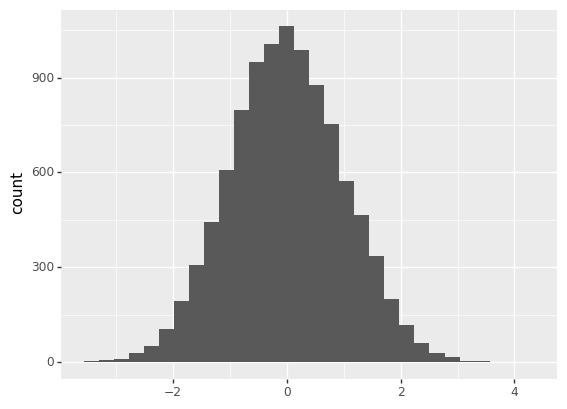

<ggplot: (8745272766790)>

In [61]:
fig = ggplot() + aes(x=arr) + stat_bin(bins=30) + geom_bar()

utils.save_gg(fig, 1)

fig

Using `geom_histogram` Histogram object

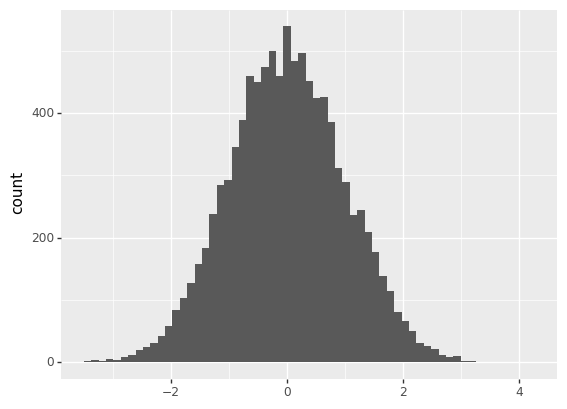

<ggplot: (8745257303525)>

In [62]:
fig = ggplot() + aes(x=arr) + geom_histogram()

utils.save_gg(fig, 2)

fig